In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random
from tqdm import tqdm_notebook
from random import shuffle
import shutil
import tensorflow as tf

%matplotlib inline

In [0]:
# http://ftp.feq.ufu.br/ubirajara/
# https://www.noip.com/support/knowledgebase/setting-up-a-ftp-server-on-your-home-computer/

In [3]:
!wget http://ftp.feq.ufu.br/ubirajara/trash_nov_22_2018.zip
!ls -l trash_nov_22_2018.zip


--2018-11-28 15:54:42--  http://ftp.feq.ufu.br/ubirajara/trash_nov_22_2018.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42806842 (41M) [application/zip]
Saving to: ‘trash_nov_22_2018.zip’

trash_nov_22_2018.z 100%[===================>]  40.82M  10.9MB/s    in 4.9s    

2018-11-28 15:54:48 (8.29 MB/s) - ‘trash_nov_22_2018.zip’ saved [42806842/42806842]

-rw-r--r-- 1 root root 42806842 Nov 22 14:54 trash_nov_22_2018.zip


In [4]:
!ls

sample_data  trash_nov_22_2018.zip


In [0]:
FILE='trash_nov_22_2018.zip'

In [0]:
import zipfile
archive = zipfile.ZipFile('trash_nov_22_2018.zip', 'r')

In [7]:
print(archive)

<zipfile.ZipFile filename='trash_nov_22_2018.zip' mode='r'>


In [0]:
# 'cardboard','glass','metal','paper','plastic','trash'

In [9]:
print(zipfile.ZipFile.infolist(archive))

[<ZipInfo filename='cardboard1.jpg' compress_type=deflate filemode='-rw-r--r--' file_size=17333 compress_size=17022>, <ZipInfo filename='cardboard2.jpg' compress_type=deflate filemode='-rw-r--r--' file_size=18110 compress_size=17733>, <ZipInfo filename='cardboard3.jpg' compress_type=deflate filemode='-rw-r--r--' file_size=21252 compress_size=21060>, <ZipInfo filename='cardboard4.jpg' compress_type=deflate filemode='-rw-r--r--' file_size=18404 compress_size=18221>, <ZipInfo filename='cardboard5.jpg' compress_type=deflate filemode='-rw-r--r--' file_size=18932 compress_size=18601>, <ZipInfo filename='cardboard6.jpg' compress_type=deflate filemode='-rw-r--r--' file_size=14830 compress_size=14442>, <ZipInfo filename='cardboard7.jpg' compress_type=deflate filemode='-rw-r--r--' file_size=20160 compress_size=19897>, <ZipInfo filename='cardboard8.jpg' compress_type=deflate filemode='-rw-r--r--' file_size=15224 compress_size=14954>, <ZipInfo filename='cardboard9.jpg' compress_type=deflate filemo

In [10]:
'''
with zipfile.ZipFile(FILE, "r") as f:
  for name in f.namelist():
    data = f.read(name)
    print( name, len(data), repr(data[:10]))
'''

'\nwith zipfile.ZipFile(FILE, "r") as f:\n  for name in f.namelist():\n    data = f.read(name)\n    print( name, len(data), repr(data[:10]))\n'

In [11]:
'''
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        data = f.read(name)
        print( name)
'''

'\nwith zipfile.ZipFile(FILE, "r") as f:\n    for name in f.namelist():\n        data = f.read(name)\n        print( name)\n'

In [12]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
print(img_name)
print(len(img_name))

['cardboard1.jpg', 'cardboard2.jpg', 'cardboard3.jpg', 'cardboard4.jpg', 'cardboard5.jpg', 'cardboard6.jpg', 'cardboard7.jpg', 'cardboard8.jpg', 'cardboard9.jpg', 'cardboard10.jpg', 'cardboard11.jpg', 'cardboard12.jpg', 'cardboard13.jpg', 'cardboard14.jpg', 'cardboard15.jpg', 'cardboard16.jpg', 'cardboard17.jpg', 'cardboard18.jpg', 'cardboard19.jpg', 'cardboard20.jpg', 'cardboard21.jpg', 'cardboard22.jpg', 'cardboard23.jpg', 'cardboard24.jpg', 'cardboard25.jpg', 'cardboard26.jpg', 'cardboard27.jpg', 'cardboard28.jpg', 'cardboard29.jpg', 'cardboard30.jpg', 'cardboard31.jpg', 'cardboard32.jpg', 'cardboard33.jpg', 'cardboard34.jpg', 'cardboard35.jpg', 'cardboard36.jpg', 'cardboard37.jpg', 'cardboard38.jpg', 'cardboard39.jpg', 'cardboard40.jpg', 'cardboard41.jpg', 'cardboard42.jpg', 'cardboard43.jpg', 'cardboard44.jpg', 'cardboard45.jpg', 'cardboard46.jpg', 'cardboard47.jpg', 'cardboard48.jpg', 'cardboard49.jpg', 'cardboard50.jpg', 'cardboard51.jpg', 'cardboard52.jpg', 'cardboard53.jpg', '

In [13]:
print(img_name[0])
print(img_name[2526])

cardboard1.jpg
trash137.jpg


In [14]:
'''
archive[]img_name[0]
img = plt.imread(os.path.join(data_dir, 'valid', 'cats', cats[0]))
plt.axis("off")
plt.imshow(img)
'''

'\narchive[]img_name[0]\nimg = plt.imread(os.path.join(data_dir, \'valid\', \'cats\', cats[0]))\nplt.axis("off")\nplt.imshow(img)\n'

In [0]:
for infile in img_name:
  outfile = os.path.splitext(infile)[0] + ".jpg"
  if infile != outfile:
    try:
      Image.open(infile).save(outfile)
    except IOError:
      print("cannot convert", infile)

trash137.jpg


TypeError: ignored

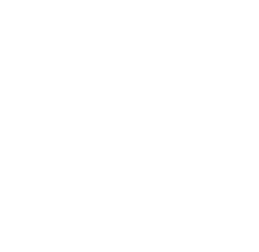

In [16]:
print(outfile)
img = cv2.imread(archive.namelist()[0])
plt.axis("off")
plt.imshow(img)

In [0]:
path1='http://ftp.feq.ufu.br/ubirajara/trash_nov_22_2018.zip'
if os.path.isfile(path1):
    img1 = cv2.imread(path1, 0)
else:
    print ("The file " + path1 + " does not exist.")

In [0]:
def get_data(local_data_root: str, is_chief: bool=True):
    data_dir = os.path.join(local_data_root)
    
    if is_chief:
        if not os.path.isdir(data_dir):
            # Download the data zip to our data directory and extract
            fallback_url = 'http://ftp.feq.ufu.br/ubirajara/trash_nov_22_2018.zip'
            tf.keras.utils.get_file(
                os.path.join( os.path.basename(fallback_url)), 
                fallback_url, 
                extract=True)
        
    return data_dir

In [0]:
data_directory = '/tmp'
data_dir = get_data(data_directory, True)

In [0]:
img = plt.imread(os.path.join(data_dir, archive.namelist()[0]))
plt.axis("off")
plt.imshow(img)

In [0]:
'''
%pylab inline
# read image to array
img =archive.read(archive.namelist()[0]) 
#print(im)
# plot the image
#img.thumbnail((64, 64), Image.ANTIALIAS) # resizes image in-place
#plt.imshow(img, interpolation="nearest")
plt.imshow(img)


'''
#plt.show() 

#plt.imshow(img.reshape(im.shape[0], im.shape[1]), cmap=plt.cm.Greys)


'''
plt.imshow(img,clim=(0.064, 0.068))
mod_img = ndimage.median_filter(img, 20)
plt.imshow(mod_img)
plt.show() 
'''

'''
from pylab import *
#plt.imshow(im, clim=(0.064, 0.068))
mod_img = ndimage.median_filter(im, 20)
plt.imshow(mod_img)
'''

In [0]:
plt.imshow(None)


In [0]:
from PIL import Image
from pylab import *

# read image to array
im = array(Image.open('empire.jpg'))

# plot the image
imshow(im)